# <span style=color:darkblue>07 projecte datascience-k-means</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from mpl_toolkits.mplot3d import Axes3D

#Normalització
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder

#Train test
from sklearn.model_selection import train_test_split

#K-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

#metriques
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


#Regresion
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


#PCA
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

#kneed, to identify the elbow point programmatically
from kneed import KneeLocator

import warnings
warnings.filterwarnings('ignore')

## <span style=color:darkblue>DataFrame Types rendiment</span>

In [2]:
df = pd.read_csv('.\\datasets_definitius\\df_finance_attributs_all.csv')

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
df.describe()

,id,rarity,amount_dolars,amount_eth,adj_close,Num_venta,Redimiento,Year,Month,YearMonth,...,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
count,34855.000000,34855.000000,3.485500e+04,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,...,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000
mean,5506.306785,0.100973,2.897959e+04,14.611954,1197.354675,1.083718,36.115634,2019.979831,5.019165,15.959690,...,0.004619,0.001521,0.003414,0.011390,0.008062,0.008119,0.002037,0.002668,0.015608,0.003472
std,2652.762722,0.043717,9.932767e+04,51.477596,974.235314,1.388433,306.463095,1.329693,3.125331,8.375266,...,0.067808,0.038966,0.058332,0.106116,0.089427,0.089742,0.045088,0.051586,0.123953,0.058818
min,1.000000,0.000200,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3258.000000,0.061466,1.297600e+02,0.600000,272.692000,0.000000,0.000000,2019.000000,2.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5565.000000,0.103943,6.212960e+03,6.480000,1224.200000,1.000000,0.826673,2021.000000,4.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7819.000000,0.119104,4.277070e+04,21.990000,1848.460000,2.000000,1.975408,2021.000000,7.000000,23.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9998.000000,0.681778,7.670020e+06,4200.000000,4168.700000,12.000000,25195.513196,2021.000000,12.000000,31.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df

,id,type_x,rarity,amount_dolars,amount_eth,adj_close,Num_venta,Redimiento,Year,Month,...,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
0,1,Male,0.094547,36890.60,60.00,614.843,2,7.171077,2020,11,...,0,0,0,0,0,0,0,0,0,0
1,1,Male,0.094547,36890.60,60.00,614.843,2,7.171077,2020,11,...,0,0,0,0,0,0,0,0,0,0
2,1,Male,0.094547,5144.36,31.00,165.947,1,44.917140,2019,4,...,0,0,0,0,0,0,0,0,0,0
3,1,Male,0.094547,5144.36,31.00,165.947,1,44.917140,2019,4,...,0,0,0,0,0,0,0,0,0,0
4,1,Male,0.094547,114.53,0.42,272.692,0,0.000000,2017,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34850,9998,Female,0.054166,59882.40,38.00,1575.850,1,5.848119,2021,3,...,0,0,0,0,0,0,0,0,0,0
34851,9998,Female,0.054166,59882.40,38.00,1575.850,1,5.848119,2021,3,...,0,0,0,0,0,0,0,0,0,0
34852,9998,Female,0.054166,10239.60,15.00,682.642,0,0.000000,2020,12,...,0,0,0,0,0,0,0,0,0,1
34853,9998,Female,0.054166,10239.60,15.00,682.642,0,0.000000,2020,12,...,0,0,0,0,0,0,0,0,0,0


### <span style=color:darkred>labelencoder</span>

In [6]:
labelencoder = LabelEncoder()

In [7]:
df['type_le'] = labelencoder.fit_transform(df['type_x'])

In [8]:
#Reorganizar columans DataFrame
df = df[['id',
 'type_x',
 'type_le',
'Redimiento',
 'rarity',
 'adj_close',
 'Num_venta',
 'amount_eth',
 '3D Glasses',
 'Bandana',
 'Beanie',
 'Big Beard',
 'Big Shades',
 'Black Lipstick',
 'Blonde Bob',
 'Blonde Short',
 'Blue Eye Shadow',
 'Buck Teeth',
 'Cap',
 'Cap Forward',
 'Chinstrap',
 'Choker',
 'Cigarette',
 'Classic Shades',
 'Clown Eyes Blue',
 'Clown Eyes Green',
 'Clown Hair Green',
 'Clown Nose',
 'Cowboy Hat',
 'Crazy Hair',
 'Dark Hair',
 'Do-rag',
 'Earring',
 'Eye Mask',
 'Eye Patch',
 'Fedora',
 'Front Beard',
 'Front Beard Dark',
 'Frown',
 'Frumpy Hair',
 'Goat',
 'Gold Chain',
 'Green Eye Shadow',
 'Half Shaved',
 'Handlebars',
 'Headband',
 'Hoodie',
 'Horned Rim Glasses',
 'Hot Lipstick',
 'Knitted Cap',
 'Luxurious Beard',
 'Medical Mask',
 'Messy Hair',
 'Mohawk',
 'Mohawk Dark',
 'Mohawk Thin',
 'Mole',
 'Mustache',
 'Muttonchops',
 'Nerd Glasses',
 'Normal Beard',
 'Normal Beard Black',
 'Orange Side',
 'Peak Spike',
 'Pigtails',
 'Pilot Helmet',
 'Pink With Hat',
 'Pipe',
 'Police Cap',
 'Purple Eye Shadow',
 'Purple Hair',
 'Purple Lipstick',
 'Red Mohawk',
 'Regular Shades',
 'Rosy Cheeks',
 'Shadow Beard',
 'Shaved Head',
 'Silver Chain',
 'Small Shades',
 'Smile',
 'Spots',
 'Straight Hair',
 'Straight Hair Blonde',
 'Straight Hair Dark',
 'Stringy Hair',
 'Tassle Hat',
 'Tiara',
 'Top Hat',
 'VR',
 'Vampire Hair',
 'Vape',
 'Welding Goggles',
 'Wild Blonde',
 'Wild Hair',
 'Wild White Hair']]

In [9]:
df_definitivo = pd.DataFrame(df.iloc[ : , 0:8])
df_definitivo

,id,type_x,type_le,Redimiento,rarity,adj_close,Num_venta,amount_eth
0,1,Male,3,7.171077,0.094547,614.843,2,60.00
1,1,Male,3,7.171077,0.094547,614.843,2,60.00
2,1,Male,3,44.917140,0.094547,165.947,1,31.00
3,1,Male,3,44.917140,0.094547,165.947,1,31.00
4,1,Male,3,0.000000,0.094547,272.692,0,0.42
...,...,...,...,...,...,...,...,...
34850,9998,Female,2,5.848119,0.054166,1575.850,1,38.00
34851,9998,Female,2,5.848119,0.054166,1575.850,1,38.00
34852,9998,Female,2,0.000000,0.054166,682.642,0,15.00
34853,9998,Female,2,0.000000,0.054166,682.642,0,15.00


### <span style=color:darkred>Normalitzar les dades</span>

In [10]:
df

,id,type_x,type_le,Redimiento,rarity,adj_close,Num_venta,amount_eth,3D Glasses,Bandana,...,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
0,1,Male,3,7.171077,0.094547,614.843,2,60.00,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Male,3,7.171077,0.094547,614.843,2,60.00,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Male,3,44.917140,0.094547,165.947,1,31.00,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,Male,3,44.917140,0.094547,165.947,1,31.00,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,Male,3,0.000000,0.094547,272.692,0,0.42,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34850,9998,Female,2,5.848119,0.054166,1575.850,1,38.00,0,0,...,0,0,0,0,0,0,0,0,0,0
34851,9998,Female,2,5.848119,0.054166,1575.850,1,38.00,0,0,...,0,0,0,0,0,0,0,0,0,0
34852,9998,Female,2,0.000000,0.054166,682.642,0,15.00,0,0,...,0,0,0,0,0,0,0,0,0,1
34853,9998,Female,2,0.000000,0.054166,682.642,0,15.00,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_scaler = pd.DataFrame(df)
df_scaler

,id,type_x,type_le,Redimiento,rarity,adj_close,Num_venta,amount_eth,3D Glasses,Bandana,...,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
0,1,Male,3,7.171077,0.094547,614.843,2,60.00,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Male,3,7.171077,0.094547,614.843,2,60.00,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Male,3,44.917140,0.094547,165.947,1,31.00,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,Male,3,44.917140,0.094547,165.947,1,31.00,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,Male,3,0.000000,0.094547,272.692,0,0.42,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34850,9998,Female,2,5.848119,0.054166,1575.850,1,38.00,0,0,...,0,0,0,0,0,0,0,0,0,0
34851,9998,Female,2,5.848119,0.054166,1575.850,1,38.00,0,0,...,0,0,0,0,0,0,0,0,0,0
34852,9998,Female,2,0.000000,0.054166,682.642,0,15.00,0,0,...,0,0,0,0,0,0,0,0,0,1
34853,9998,Female,2,0.000000,0.054166,682.642,0,15.00,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_scaler = df_scaler.iloc[ : , 2:8]

In [13]:
df_scaler

,type_le,Redimiento,rarity,adj_close,Num_venta,amount_eth
0,3,7.171077,0.094547,614.843,2,60.00
1,3,7.171077,0.094547,614.843,2,60.00
2,3,44.917140,0.094547,165.947,1,31.00
3,3,44.917140,0.094547,165.947,1,31.00
4,3,0.000000,0.094547,272.692,0,0.42
...,...,...,...,...,...,...
34850,2,5.848119,0.054166,1575.850,1,38.00
34851,2,5.848119,0.054166,1575.850,1,38.00
34852,2,0.000000,0.054166,682.642,0,15.00
34853,2,0.000000,0.054166,682.642,0,15.00


In [14]:
scalerN = Normalizer()

In [15]:
df_scaler.iloc[ : , 0:8]

,type_le,Redimiento,rarity,adj_close,Num_venta,amount_eth
0,3,7.171077,0.094547,614.843,2,60.00
1,3,7.171077,0.094547,614.843,2,60.00
2,3,44.917140,0.094547,165.947,1,31.00
3,3,44.917140,0.094547,165.947,1,31.00
4,3,0.000000,0.094547,272.692,0,0.42
...,...,...,...,...,...,...
34850,2,5.848119,0.054166,1575.850,1,38.00
34851,2,5.848119,0.054166,1575.850,1,38.00
34852,2,0.000000,0.054166,682.642,0,15.00
34853,2,0.000000,0.054166,682.642,0,15.00


In [16]:
#Normalitzem les variable numeriques
df_scaler.iloc[ : , 0:8]= scalerN.fit_transform(df_scaler.iloc[ : , 0:8])

In [17]:
df_scaler

,type_le,Redimiento,rarity,adj_close,Num_venta,amount_eth
0,0.004856,0.011607,0.000153,0.995188,0.003237,0.097116
1,0.004856,0.011607,0.000153,0.995188,0.003237,0.097116
2,0.017170,0.257081,0.000541,0.949790,0.005723,0.177427
3,0.017170,0.257081,0.000541,0.949790,0.005723,0.177427
4,0.011001,0.000000,0.000347,0.999938,0.000000,0.001540
...,...,...,...,...,...,...
34850,0.001269,0.003710,0.000034,0.999701,0.000634,0.024107
34851,0.001269,0.003710,0.000034,0.999701,0.000634,0.024107
34852,0.002929,0.000000,0.000079,0.999754,0.000000,0.021968
34853,0.002929,0.000000,0.000079,0.999754,0.000000,0.021968


### <span style=color:darkred>Cantidad de Clusters</span>

In [18]:
sse = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaler)
    
    sse.append(kmeans.inertia_)

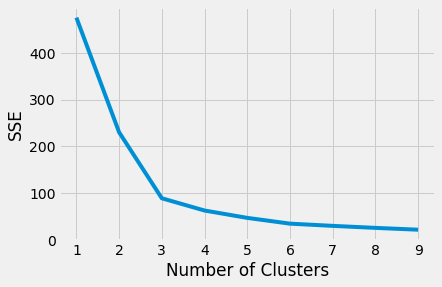

In [19]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse) 
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [20]:
kl = KneeLocator(range(1, 10), sse, 
                 curve="convex", 
                 direction="decreasing")

kl.elbow

3

### <span style=color:darkred>Cantidad de Clusters</span>

In [21]:
clustering = KMeans(n_clusters=kl.elbow,max_iter=300)
clustering.fit(df_scaler)

KMeans(n_clusters=3)

In [22]:
clustering.labels_

array([0, 0, 2, ..., 0, 0, 0])

In [23]:
df['Kmeans_Clustering']= clustering.labels_
df_definitivo['Kmeans_Clustering_types']= clustering.labels_
df_scaler['Kmeans_Clustering']= clustering.labels_
df.to_csv('.\\clusters\\df_rendimen_type_fin_tot_escalat.csv')
df_definitivo.to_csv('.\\clusters\\definitivo_rendimen_type_fin_tot_escalat.csv')
df_scaler

,type_le,Redimiento,rarity,adj_close,Num_venta,amount_eth,Kmeans_Clustering
0,0.004856,0.011607,0.000153,0.995188,0.003237,0.097116,0
1,0.004856,0.011607,0.000153,0.995188,0.003237,0.097116,0
2,0.017170,0.257081,0.000541,0.949790,0.005723,0.177427,2
3,0.017170,0.257081,0.000541,0.949790,0.005723,0.177427,2
4,0.011001,0.000000,0.000347,0.999938,0.000000,0.001540,0
...,...,...,...,...,...,...,...
34850,0.001269,0.003710,0.000034,0.999701,0.000634,0.024107,0
34851,0.001269,0.003710,0.000034,0.999701,0.000634,0.024107,0
34852,0.002929,0.000000,0.000079,0.999754,0.000000,0.021968,0
34853,0.002929,0.000000,0.000079,0.999754,0.000000,0.021968,0


### <span style=color:darkred>Cantidad de Clusters</span>

In [24]:
pca = PCA(n_components=2)

In [25]:
pca_df = pca.fit_transform (df_scaler)

In [26]:
pca_df

array([[-0.0563282 ,  0.05135764],
       [-0.0563282 ,  0.05135764],
       [ 1.95342967, -0.01620492],
       ...,
       [-0.0610805 ,  0.00442679],
       [-0.0610805 ,  0.00442679],
       [-0.0610805 ,  0.00442679]])

In [27]:
pca_df_df = pd.DataFrame(pca_df, columns=['componente1', 'componente2'])
pca_df_df

,componente1,componente2
0,-0.056328,0.051358
1,-0.056328,0.051358
2,1.953430,-0.016205
3,1.953430,-0.016205
4,-0.061591,-0.005028
...,...,...
34850,-0.060363,0.004784
34851,-0.060363,0.004784
34852,-0.061080,0.004427
34853,-0.061080,0.004427


In [28]:
pca_df_df['Kmeans_Clustering']= clustering.labels_
pca_df_df
pca_df_df.to_csv('.\\clusters\\df_pca_rendiment.csv')

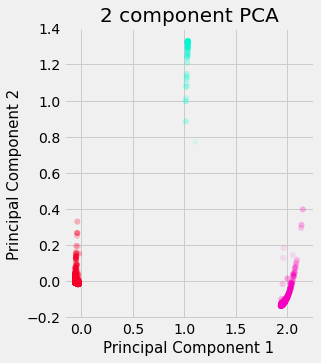

In [29]:
fig = plt.figure(figsize=(4,5))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(x = pca_df_df.componente1, y= pca_df_df.componente2,
          c = pca_df_df.Kmeans_Clustering , edgecolor='none', alpha=0.1,
           cmap=plt.cm.get_cmap('gist_rainbow', 10))

### <span style=color:darkred>Evaulació</span>

In [30]:
silhouette_score(df_scaler, clustering.labels_).round(4)

0.982

In [31]:
df

,id,type_x,type_le,Redimiento,rarity,adj_close,Num_venta,amount_eth,3D Glasses,Bandana,...,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair,Kmeans_Clustering
0,1,Male,3,7.171077,0.094547,614.843,2,60.00,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Male,3,7.171077,0.094547,614.843,2,60.00,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Male,3,44.917140,0.094547,165.947,1,31.00,0,0,...,0,0,0,0,0,0,0,0,0,2
3,1,Male,3,44.917140,0.094547,165.947,1,31.00,0,0,...,0,0,0,0,0,0,0,0,0,2
4,1,Male,3,0.000000,0.094547,272.692,0,0.42,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34850,9998,Female,2,5.848119,0.054166,1575.850,1,38.00,0,0,...,0,0,0,0,0,0,0,0,0,0
34851,9998,Female,2,5.848119,0.054166,1575.850,1,38.00,0,0,...,0,0,0,0,0,0,0,0,0,0
34852,9998,Female,2,0.000000,0.054166,682.642,0,15.00,0,0,...,0,0,0,0,0,0,0,0,1,0
34853,9998,Female,2,0.000000,0.054166,682.642,0,15.00,0,0,...,0,0,0,0,0,0,0,0,0,0


## <span style=color:darkblue>DataFrame Attributes rendiment</span>

In [32]:
df = pd.read_csv('.\\datasets_definitius\\df_rend_traits.csv')

In [33]:
df = df.drop(['Unnamed: 0'], axis=1)

In [34]:
df.describe()

,id,rarity,amount_eth,adj_close,Num_venta,Redimiento
count,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000
mean,5506.306785,0.100973,14.611954,1197.354675,1.083718,36.115634
std,2652.762722,0.043717,51.477596,974.235314,1.388433,306.463095
min,1.000000,0.000200,0.000000,0.000000,0.000000,0.000000
25%,3258.000000,0.061466,0.600000,272.692000,0.000000,0.000000
50%,5565.000000,0.103943,6.480000,1224.200000,1.000000,0.826673
75%,7819.000000,0.119104,21.990000,1848.460000,2.000000,1.975408
max,9998.000000,0.681778,4200.000000,4168.700000,12.000000,25195.513196


In [35]:
df_definitivo['idaccesori'] = df['accesories2']

In [36]:
df

,id,type_x,rarity,amount_eth,adj_close,Num_venta,Redimiento,accesories2
0,1,Male,0.094547,60.00,614.843,2,7.171077,Smile
1,1,Male,0.094547,60.00,614.843,2,7.171077,Mohawk
2,1,Male,0.094547,31.00,165.947,1,44.917140,Smile
3,1,Male,0.094547,31.00,165.947,1,44.917140,Mohawk
4,1,Male,0.094547,0.42,272.692,0,0.000000,Smile
...,...,...,...,...,...,...,...,...
34850,9998,Female,0.054166,38.00,1575.850,1,5.848119,Black Lipstick
34851,9998,Female,0.054166,38.00,1575.850,1,5.848119,Clown Eyes Green
34852,9998,Female,0.054166,15.00,682.642,0,0.000000,Wild White Hair
34853,9998,Female,0.054166,15.00,682.642,0,0.000000,Black Lipstick


### <span style=color:darkred>labelencoder</span>

In [37]:
labelencoder = LabelEncoder()

In [38]:
#df['type_le'] = labelencoder.fit_transform(df['type_x'])
df['accesories_le'] = labelencoder.fit_transform(df['accesories2'])

In [39]:
columans = list(df.columns)

In [40]:
df = df[[
 'accesories_le',
 'Num_venta',
 'rarity',
 'amount_eth',
 'adj_close',
 'Redimiento']]

In [41]:
df

,accesories_le,Num_venta,rarity,amount_eth,adj_close,Redimiento
0,71,2,0.094547,60.00,614.843,7.171077
1,45,2,0.094547,60.00,614.843,7.171077
2,71,1,0.094547,31.00,165.947,44.917140
3,45,1,0.094547,31.00,165.947,44.917140
4,71,0,0.094547,0.42,272.692,0.000000
...,...,...,...,...,...,...
34850,5,1,0.054166,38.00,1575.850,5.848119
34851,17,1,0.054166,38.00,1575.850,5.848119
34852,86,0,0.054166,15.00,682.642,0.000000
34853,5,0,0.054166,15.00,682.642,0.000000


### <span style=color:darkred>Normalitzar les dades</span>

In [42]:
df

,accesories_le,Num_venta,rarity,amount_eth,adj_close,Redimiento
0,71,2,0.094547,60.00,614.843,7.171077
1,45,2,0.094547,60.00,614.843,7.171077
2,71,1,0.094547,31.00,165.947,44.917140
3,45,1,0.094547,31.00,165.947,44.917140
4,71,0,0.094547,0.42,272.692,0.000000
...,...,...,...,...,...,...
34850,5,1,0.054166,38.00,1575.850,5.848119
34851,17,1,0.054166,38.00,1575.850,5.848119
34852,86,0,0.054166,15.00,682.642,0.000000
34853,5,0,0.054166,15.00,682.642,0.000000


In [43]:
#df = df.drop(['Year','Month','YearMonth','type_x','type_y','idpunks','accesories2','Unnamed: 14'],axis=1)

In [44]:
df_scaler = pd.DataFrame(df)
df_scaler

,accesories_le,Num_venta,rarity,amount_eth,adj_close,Redimiento
0,71,2,0.094547,60.00,614.843,7.171077
1,45,2,0.094547,60.00,614.843,7.171077
2,71,1,0.094547,31.00,165.947,44.917140
3,45,1,0.094547,31.00,165.947,44.917140
4,71,0,0.094547,0.42,272.692,0.000000
...,...,...,...,...,...,...
34850,5,1,0.054166,38.00,1575.850,5.848119
34851,17,1,0.054166,38.00,1575.850,5.848119
34852,86,0,0.054166,15.00,682.642,0.000000
34853,5,0,0.054166,15.00,682.642,0.000000


In [45]:
df_scaler.iloc[ : , 0:7]

,accesories_le,Num_venta,rarity,amount_eth,adj_close,Redimiento
0,71,2,0.094547,60.00,614.843,7.171077
1,45,2,0.094547,60.00,614.843,7.171077
2,71,1,0.094547,31.00,165.947,44.917140
3,45,1,0.094547,31.00,165.947,44.917140
4,71,0,0.094547,0.42,272.692,0.000000
...,...,...,...,...,...,...
34850,5,1,0.054166,38.00,1575.850,5.848119
34851,17,1,0.054166,38.00,1575.850,5.848119
34852,86,0,0.054166,15.00,682.642,0.000000
34853,5,0,0.054166,15.00,682.642,0.000000


In [46]:
scalerN = Normalizer()

In [47]:
#Normalitzem les variable numeriques
df_scaler.iloc[ : , 0:7]= scalerN.fit_transform(df_scaler.iloc[ : , 0:7])

In [48]:
df_scaler

,accesories_le,Num_venta,rarity,amount_eth,adj_close,Redimiento
0,0.114171,0.003216,0.000152,0.096482,0.988692,0.011531
1,0.072646,0.003229,0.000153,0.096861,0.992570,0.011577
2,0.376516,0.005303,0.000501,0.164394,0.880025,0.238198
3,0.249450,0.005543,0.000524,0.171844,0.919900,0.248991
4,0.251966,0.000000,0.000336,0.001491,0.967735,0.000000
...,...,...,...,...,...,...
34850,0.003172,0.000634,0.000034,0.024107,0.999697,0.003710
34851,0.010784,0.000634,0.000034,0.024105,0.999644,0.003710
34852,0.124963,0.000000,0.000079,0.021796,0.991922,0.000000
34853,0.007323,0.000000,0.000079,0.021968,0.999732,0.000000


In [49]:
df_scaler.iloc[ : , 0:6]

,accesories_le,Num_venta,rarity,amount_eth,adj_close,Redimiento
0,0.114171,0.003216,0.000152,0.096482,0.988692,0.011531
1,0.072646,0.003229,0.000153,0.096861,0.992570,0.011577
2,0.376516,0.005303,0.000501,0.164394,0.880025,0.238198
3,0.249450,0.005543,0.000524,0.171844,0.919900,0.248991
4,0.251966,0.000000,0.000336,0.001491,0.967735,0.000000
...,...,...,...,...,...,...
34850,0.003172,0.000634,0.000034,0.024107,0.999697,0.003710
34851,0.010784,0.000634,0.000034,0.024105,0.999644,0.003710
34852,0.124963,0.000000,0.000079,0.021796,0.991922,0.000000
34853,0.007323,0.000000,0.000079,0.021968,0.999732,0.000000


In [50]:
X = np.array(df_scaler.iloc[ : , 0:6])
X

array([[1.14170879e-01, 3.21608110e-03, 1.52035249e-04, 9.64824330e-02,
        9.88692476e-01, 1.15313821e-02],
       [7.26456520e-02, 3.22869565e-03, 1.52631582e-04, 9.68608694e-02,
        9.92570459e-01, 1.15766120e-02],
       [3.76516308e-01, 5.30304660e-03, 5.01386616e-04, 1.64394444e-01,
        8.80024673e-01, 2.38197684e-01],
       ...,
       [1.24963428e-01, 0.00000000e+00, 7.87073430e-05, 2.17959467e-02,
        9.91921908e-01, 0.00000000e+00],
       [7.32251945e-03, 0.00000000e+00, 7.93270500e-05, 2.19675583e-02,
        9.99731864e-01, 0.00000000e+00],
       [2.48895207e-02, 0.00000000e+00, 7.93046012e-05, 2.19613418e-02,
        9.99448951e-01, 0.00000000e+00]])

### <span style=color:darkred>Cantidad de Clusters</span>

In [51]:
sse = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaler)
    
    sse.append(kmeans.inertia_)

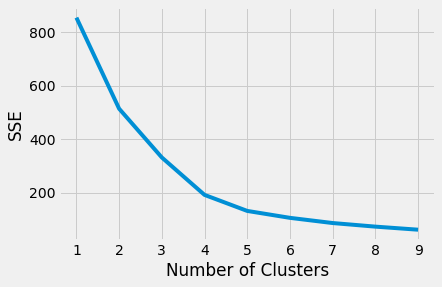

In [52]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse) 
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [53]:
kl = KneeLocator(range(1, 10), sse, 
                 curve="convex", 
                 direction="decreasing")

kl.elbow

4

### <span style=color:darkred>Cantidad de Clusters</span>

In [54]:
clustering = KMeans(n_clusters=kl.elbow,max_iter=300)
clustering.fit(df_scaler)

KMeans(n_clusters=4)

In [55]:
clustering.labels_

array([0, 0, 2, ..., 0, 0, 0])

In [56]:
df['Kmeans_Clustering']= clustering.labels_
df_definitivo['Kmeans_Clustering_attiributes']= clustering.labels_
df_scaler['Kmeans_Clustering']= clustering.labels_
df.to_csv('.\\clusters\\df_rendimen_Attri_fin_tot_escalat.csv')
df_definitivo.to_csv('.\\clusters\\definitivo_rendimen_type_fin_tot_escalat.csv')
df

,accesories_le,Num_venta,rarity,amount_eth,adj_close,Redimiento,Kmeans_Clustering
0,0.114171,0.003216,0.000152,0.096482,0.988692,0.011531,0
1,0.072646,0.003229,0.000153,0.096861,0.992570,0.011577,0
2,0.376516,0.005303,0.000501,0.164394,0.880025,0.238198,2
3,0.249450,0.005543,0.000524,0.171844,0.919900,0.248991,2
4,0.251966,0.000000,0.000336,0.001491,0.967735,0.000000,2
...,...,...,...,...,...,...,...
34850,0.003172,0.000634,0.000034,0.024107,0.999697,0.003710,0
34851,0.010784,0.000634,0.000034,0.024105,0.999644,0.003710,0
34852,0.124963,0.000000,0.000079,0.021796,0.991922,0.000000,0
34853,0.007323,0.000000,0.000079,0.021968,0.999732,0.000000,0


### <span style=color:darkred>Cantidad de Clusters</span>

In [57]:
pca = PCA(n_components=2)

In [58]:
pca_df = pca.fit_transform (df_scaler)

In [59]:
pca_df

array([[-0.47826264,  0.06146944],
       [-0.4818862 ,  0.02487487],
       [ 1.54495177,  0.10942224],
       ...,
       [-0.47775526,  0.06843329],
       [-0.48794197, -0.03398443],
       [-0.48644374, -0.01904224]])

In [60]:
pca_df_df = pd.DataFrame(pca_df, columns=['componente1', 'componente2'])
pca_df_df

,componente1,componente2
0,-0.478263,0.061469
1,-0.481886,0.024875
2,1.544952,0.109422
3,1.533464,-0.017003
4,1.524807,0.040685
...,...,...
34850,-0.488179,-0.038603
34851,-0.487532,-0.032155
34852,-0.477755,0.068433
34853,-0.487942,-0.033984


In [61]:
pca_df_df['Kmeans_Clustering']= clustering.labels_
pca_df_df
pca_df_df.to_csv('.\\clusters\\df_pca_rendiment_traits.csv')

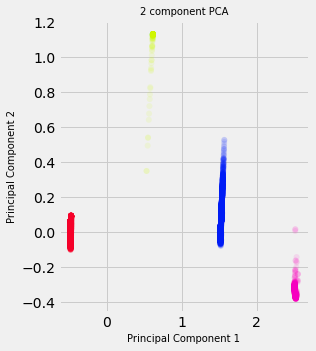

In [62]:
fig = plt.figure(figsize=(4,5))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2 component PCA', fontsize = 10)
ax.scatter(x = pca_df_df.componente1, y= pca_df_df.componente2,
          c = pca_df_df.Kmeans_Clustering , edgecolor='none', alpha=0.1,
           cmap=plt.cm.get_cmap('gist_rainbow', 5))

### <span style=color:darkred>Evaulació</span>

In [63]:
silhouette_score(df_scaler, clustering.labels_).round(4)

0.9506

In [64]:
#df['accesories_le'] = labelencoder.fit_transform(df['accesories2'])
df_definitivo['idaccesori_le'] = labelencoder.fit_transform(df_definitivo['idaccesori'])

In [65]:
df_definitivo

,id,type_x,type_le,Redimiento,rarity,adj_close,Num_venta,amount_eth,Kmeans_Clustering_types,idaccesori,Kmeans_Clustering_attiributes,idaccesori_le
0,1,Male,3,7.171077,0.094547,614.843,2,60.00,0,Smile,0,71
1,1,Male,3,7.171077,0.094547,614.843,2,60.00,0,Mohawk,0,45
2,1,Male,3,44.917140,0.094547,165.947,1,31.00,2,Smile,2,71
3,1,Male,3,44.917140,0.094547,165.947,1,31.00,2,Mohawk,2,45
4,1,Male,3,0.000000,0.094547,272.692,0,0.42,0,Smile,2,71
...,...,...,...,...,...,...,...,...,...,...,...,...
34850,9998,Female,2,5.848119,0.054166,1575.850,1,38.00,0,Black Lipstick,0,5
34851,9998,Female,2,5.848119,0.054166,1575.850,1,38.00,0,Clown Eyes Green,0,17
34852,9998,Female,2,0.000000,0.054166,682.642,0,15.00,0,Wild White Hair,0,86
34853,9998,Female,2,0.000000,0.054166,682.642,0,15.00,0,Black Lipstick,0,5


In [66]:
df_definitivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34855 entries, 0 to 34854
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             34855 non-null  int64  
 1   type_x                         34855 non-null  object 
 2   type_le                        34855 non-null  int32  
 3   Redimiento                     34855 non-null  float64
 4   rarity                         34855 non-null  float64
 5   adj_close                      34855 non-null  float64
 6   Num_venta                      34855 non-null  int64  
 7   amount_eth                     34855 non-null  float64
 8   Kmeans_Clustering_types        34855 non-null  int32  
 9   idaccesori                     34844 non-null  object 
 10  Kmeans_Clustering_attiributes  34855 non-null  int32  
 11  idaccesori_le                  34855 non-null  int32  
dtypes: float64(4), int32(4), int64(2), object(2)
m

In [67]:
df_definitivo['Kmeans_Clustering_types'].count()

34855

___Selecion del cluster 2 mas mas rentables___

In [68]:
#df_definitivo= pd.DataFrame( df_definitivo[df_definitivo['Kmeans_Clustering_types']==2])

In [69]:
df_definitivo.sort_values('Redimiento')

,id,type_x,type_le,Redimiento,rarity,adj_close,Num_venta,amount_eth,Kmeans_Clustering_types,idaccesori,Kmeans_Clustering_attiributes,idaccesori_le
17427,5565,Female,2,0.000000,0.107543,365.57,0,1.2,0,Green Eye Shadow,0,34
19008,5999,Male,3,0.000000,0.149592,2367.66,0,14.5,0,Mole,0,48
19007,5999,Male,3,0.000000,0.149592,2367.66,0,14.5,0,Small Shades,0,70
19006,5999,Male,3,0.000000,0.149592,2367.66,0,14.5,0,Mohawk,0,45
19005,5997,Male,3,0.000000,0.149525,3715.15,0,14.5,0,Mole,0,48
...,...,...,...,...,...,...,...,...,...,...,...,...
21172,6552,Male,3,8447.378898,0.056414,2157.66,1,59.0,2,Cowboy Hat,3,20
21171,6552,Male,3,8447.378898,0.056414,2157.66,1,59.0,2,Smile,3,71
5232,2424,Zombie,4,25195.513196,0.008871,2643.59,1,325.0,2,Bandana,3,1
5234,2424,Zombie,4,25195.513196,0.008871,2643.59,1,325.0,2,Earring,3,24


## <span style=color:darkblue>Regression Model</span>

__Ordenar el dataframe por rendiment__

order_by_rendiment

In [70]:
df_definitivo['type_le'] = df_definitivo['type_le'].astype('int64')
df_definitivo['Kmeans_Clustering_types'] = df_definitivo['Kmeans_Clustering_types'].astype('int64')
df_definitivo['Kmeans_Clustering_attiributes'] = df_definitivo['Kmeans_Clustering_attiributes'].astype('int64')
df_definitivo['idaccesori_le'] = df_definitivo['idaccesori_le'].astype('int64')

In [71]:
df_definitivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34855 entries, 0 to 34854
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             34855 non-null  int64  
 1   type_x                         34855 non-null  object 
 2   type_le                        34855 non-null  int64  
 3   Redimiento                     34855 non-null  float64
 4   rarity                         34855 non-null  float64
 5   adj_close                      34855 non-null  float64
 6   Num_venta                      34855 non-null  int64  
 7   amount_eth                     34855 non-null  float64
 8   Kmeans_Clustering_types        34855 non-null  int64  
 9   idaccesori                     34844 non-null  object 
 10  Kmeans_Clustering_attiributes  34855 non-null  int64  
 11  idaccesori_le                  34855 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usag

In [72]:
df_definitivo1=pd.DataFrame()

In [73]:
df_definitivo1 = df_definitivo[['type_le','Redimiento','amount_eth',]]

In [74]:
df_definitivo1.columns

Index(['type_le', 'Redimiento', 'amount_eth'], dtype='object')

__Tractament de Outliers__

In [75]:
df_definitivo2 = pd.DataFrame(df_definitivo1)

In [76]:
df_definitivo2

,type_le,Redimiento,amount_eth
0,3,7.171077,60.00
1,3,7.171077,60.00
2,3,44.917140,31.00
3,3,44.917140,31.00
4,3,0.000000,0.42
...,...,...,...
34850,2,5.848119,38.00
34851,2,5.848119,38.00
34852,2,0.000000,15.00
34853,2,0.000000,15.00


___Correlació___

In [77]:
def tidy_corr_matrix(corr_mat):

    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

In [78]:
corr_matrix = df_definitivo2.select_dtypes(include=['float64', 'int64']).corr()
tidy_corr_matrix(corr_matrix).head(20)

,variable_1,variable_2,r,abs_r
5,Redimiento,amount_eth,0.115758,0.115758
7,amount_eth,Redimiento,0.115758,0.115758
2,type_le,amount_eth,-0.058525,0.058525
6,amount_eth,type_le,-0.058525,0.058525
1,type_le,Redimiento,0.023218,0.023218
3,Redimiento,type_le,0.023218,0.023218


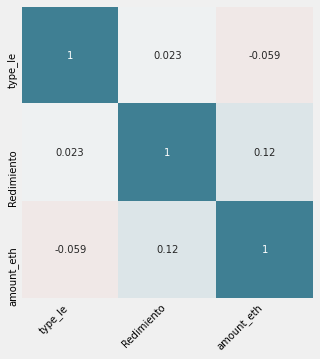

In [79]:
ig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [80]:
#df_definitivo2 = df_definitivo2[['id', 'Redimiento','type_x', 'type_le', 'rarity', 'adj_close','Num_venta', 'amount_eth', 'Kmeans_Clustering_types', 
#       'Kmeans_Clustering_attiributes','idaccesori']]

df_definitivo2

,type_le,Redimiento,amount_eth
0,3,7.171077,60.00
1,3,7.171077,60.00
2,3,44.917140,31.00
3,3,44.917140,31.00
4,3,0.000000,0.42
...,...,...,...
34850,2,5.848119,38.00
34851,2,5.848119,38.00
34852,2,0.000000,15.00
34853,2,0.000000,15.00


### <span style=color:darkred>Variable resposta</span>

In [81]:
#sns.pairplot(df_definitivo)

<AxesSubplot:xlabel='type_le', ylabel='Redimiento'>

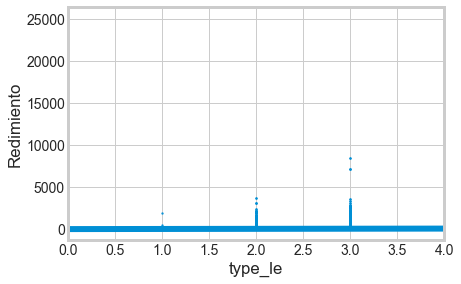

In [90]:
sns.regplot(x='type_le',y='Redimiento',data= df_definitivo2, scatter_kws={'s':2})

<AxesSubplot:xlabel='amount_eth', ylabel='Redimiento'>

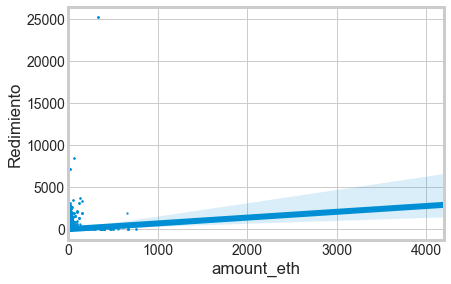

In [93]:
sns.regplot(x='amount_eth',y='Redimiento',data=df_definitivo2,scatter_kws={'s':2})

### <span style=color:darkred>Train/test</span>

In [82]:
df_definitivo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34855 entries, 0 to 34854
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   type_le     34855 non-null  int64  
 1   Redimiento  34855 non-null  float64
 2   amount_eth  34855 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 817.0 KB


In [83]:
y = np.array(df_definitivo2.type_le).reshape(-1,1)
X = np.array(df_definitivo2.select_dtypes(include=['float64','int64']).drop(['type_le'],axis=1))

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, 
    random_state=4 ) 

In [85]:
scaler = Normalizer()

In [86]:
X_train= scalerN.fit_transform(X_train)

In [87]:
#y_train= scalerN.fit_transform(y_train)

### <span style=color:darkred>modelsRegressio</span>

In [88]:
models=[LinearRegression(), Ridge(), Lasso(),DecisionTreeRegressor(),RandomForestRegressor(random_state=32)]

for model in models:
    model.fit(X_train,y_train)
    prediccions = model.predict(X_test)
    print(type(model).__name__)
    print("   MAE", mean_absolute_error(y_test,prediccions))
    print("   RMSE", (mean_squared_error(y_test,prediccions)))
    print( "  R2", r2_score(y_test,prediccions))

LinearRegression
   MAE 1.8375461232852595
   RMSE 162.01794129727443
  R2 -690.9371642228924
Ridge
   MAE 1.8394775499164677
   RMSE 162.91934322610535
  R2 -694.7868211773399
Lasso
   MAE 0.446388174218053
   RMSE 0.234166248434802
  R2 -6.412006801603809e-05
DecisionTreeRegressor
   MAE 0.5597487451892306
   RMSE 0.4965459453399049
  R2 -1.12062065826687
RandomForestRegressor
   MAE 0.4600513208899492
   RMSE 0.24698107080135198
  R2 -0.05479294687159331


array([[<AxesSubplot:title={'center':'type_le'}>,
        <AxesSubplot:title={'center':'Redimiento'}>],
       [<AxesSubplot:title={'center':'amount_eth'}>, <AxesSubplot:>]],
      dtype=object)

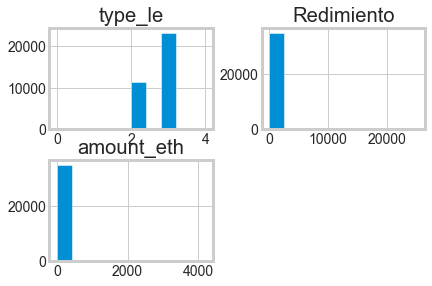

In [89]:
sns.set_style('whitegrid')
df_definitivo2.hist()

y = numero venta
LinearRegression
   MAE 23.40684849329062
   RMSE 1279.6528289531852
  R2 -856.3969635030317
Ridge
   MAE 23.092509209030815
   RMSE 1245.4311695410997
  R2 -833.4676609593411
Lasso
   MAE 0.9573992166631556
   RMSE 1.4928762387777725
  R2 -0.0002615748999497125
DecisionTreeRegressor
   MAE 0.6849734826163818
   RMSE 1.3772939575685073
  R2 0.07718122419474382
RandomForestRegressor
   MAE 0.9685550657602378
   RMSE 1.1549621472136586
  R2 0.22614867440881503
hi han dos que estan millor...
canvio